In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# pixels das imagens- intervalo [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)


In [2]:
ann = tf.keras.models.Sequential()
ann.add(Flatten(input_shape=(28, 28)))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(Dropout(0.2))  # Dropout para regularização
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [3]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = ann.fit(X_train, y_train,  validation_split=0.2, batch_size = 10, epochs = 15, verbose=0)

In [4]:
y_pred = ann.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1)
y_test = tf.argmax(y_test, axis=1)

In [5]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.96      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.99      0.96      0.97       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



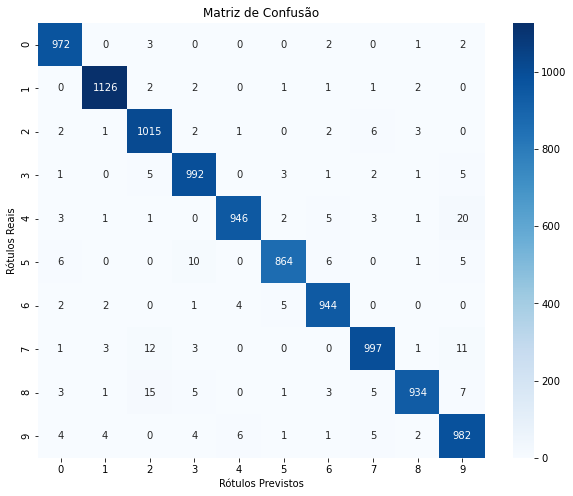

In [6]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Reais')
plt.title('Matriz de Confusão')
plt.show()

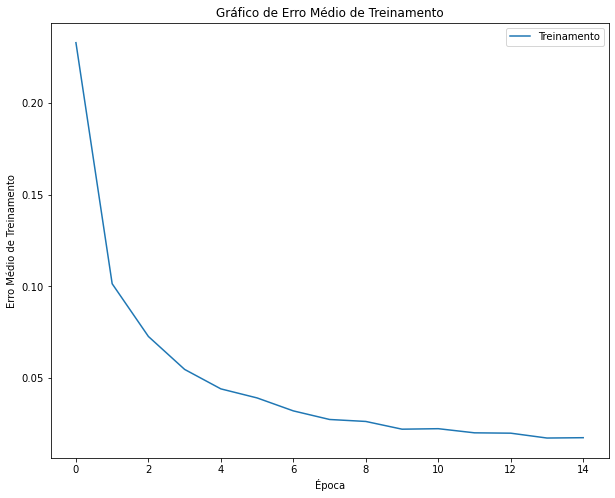

In [7]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.plot(history.history['loss'], label='Treinamento')
plt.xlabel('Época')
plt.ylabel('Erro Médio de Treinamento')
plt.title('Gráfico de Erro Médio de Treinamento')
plt.legend()
plt.show()

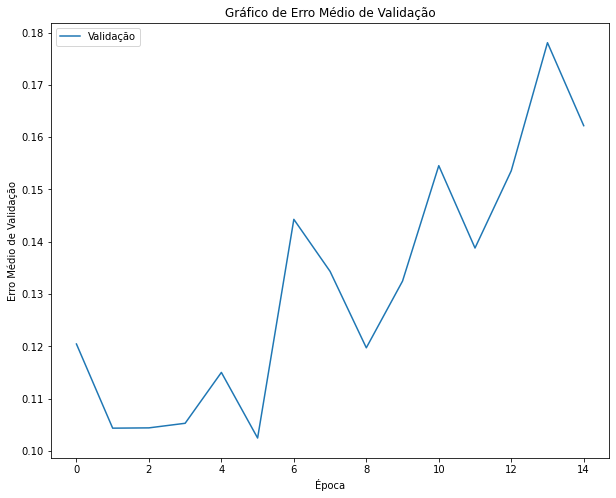

In [8]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Erro Médio de Validação')
plt.title('Gráfico de Erro Médio de Validação')
plt.legend()
plt.show()

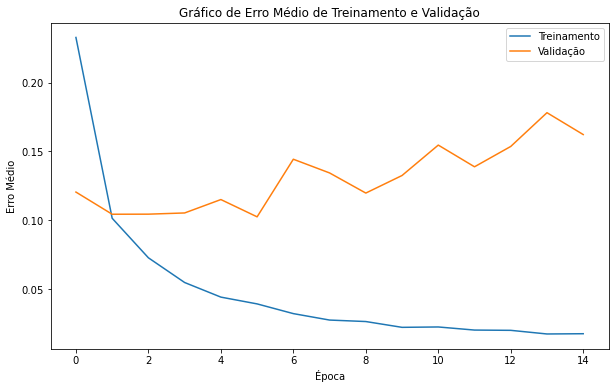

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Erro Médio')
plt.title('Gráfico de Erro Médio de Treinamento e Validação')
plt.legend()
plt.show()